In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumGothic')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
from datetime import datetime
from datetime import timedelta
from pandas import Series, DataFrame
import scipy.stats

import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

In [2]:
kor = pd.read_excel('./kor.xlsx', sheet_name='Sheet1')
ger = pd.read_excel('./german.xlsx', sheet_name='Sheet1')

In [3]:
kor_df = kor.set_index('id').copy()
ger_df = ger.set_index('id').copy()
#ita_df = ita.set_index('id').copy()
#usa_df = usa.set_index('id').copy()
#mex_df = mex.set_index('id').copy()
#uk_df = uk.set_index('id').copy()


#sgp_sars_df = pd.DataFrame(sgp_sars.신규확진.copy())
#hk_sars_df = pd.DataFrame(hk_sars.신규확진.copy())
#kor_mers_df = pd.DataFrame(kor_mers.신규확진.copy())

In [4]:
corona = pd.read_excel('./data.xlsx', sheet_name= 'data')

In [5]:
corona_df = pd.DataFrame(corona.new_cases.copy())

In [6]:
corona_df

,new_cases
0,0
1,0
2,0
3,0
4,0
...,...
241,299
242,248
243,235
244,267


In [7]:
kor_val = kor_df.cases.values
ger_val = ger_df.cases.values
#ita_val = ita_df.cases.values
#usa_val = usa_df.cases.values
#mex_val = mex_df.cases.values
#uk_val = uk_df.cases.values


#sgp_val = sgp_sars_df.신규확진.values
#hk_sars_val = hk_sars_df.신규확진.values
#kor_mers_val = kor_mers_df.신규확진.values

In [8]:
corona_val = corona_df.new_cases.values

In [9]:
corona_val

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   1,
         1,   0,   0,   0,   3,   5,   3,   0,   1,   2,   5,   1,   0,
         1,   2,   1,   0,   0,   0,   0,   1,   1,   1,  15,  34,  75,
       190, 210, 207, 130, 254, 449, 427, 909, 595, 686, 600, 516, 438,
       518, 483, 367, 248, 131, 242, 114, 110, 107,  76,  74,  84,  93,
       152,  87, 147,  98,  64,  76, 100, 104,  91, 146, 105,  78, 125,
       101,  89,  86,  94,  81,  47,  47,  53,  39,  27,  30,  32,  25,
        27,  27,  22,  22,  18,   8,  13,   9,  11,   8,   6,  10,  10,
        10,  14,   9,   4,   9,   6,  13,   8,   3,   2,   4,  12,  18,
        34,  35,  27,  26,  29,  27,  19,  13,  15,  13,  32,  12,  20,
        23,  25,  16,  19,  40,  79,  58,  39,  27,  38,  49,  39,  20,
        19,  51,  57,  38,  38,  50,  45,  56,  48,  34,  36,  34,  43,
        59,  49,  67,  48,  17,  46,  51,  28,  39,  51,  62,  4

In [10]:
kor_data = kor_val.reshape(-1,1)
ger_data = ger_val.reshape(-1,1)
#ita_data = ita_val.reshape(-1,1)
#usa_data = usa_val.reshape(-1,1)
#mex_data = mex_val.reshape(-1,1)
#uk_data = uk_val.reshape(-1,1)

#sgp_data = sgp_val.reshape(-1,1)
#hk_sars_data = hk_sars_val.reshape(-1,1)
#kor_mers_data = kor_mers_val.reshape(-1,1)

In [11]:
corona_data = corona_val.reshape(-1,1)

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
kor_dataset = scaler.fit_transform(kor_data)
ger_dataset = scaler.fit_transform(ger_data)
#ita_dataset = scaler.fit_transform(ita_data)
#usa_dataset = scaler.fit_transform(usa_data)
#mex_dataset = scaler.fit_transform(mex_data)
#uk_dataset = scaler.fit_transform(uk_data)

corona_dataset = scaler.fit_transform(corona_data)

#sgp_dataset = scaler.fit_transform(sgp_data)
#hk_sars_dataset = scaler.fit_transform(hk_sars_data)
#kor_mers_dataset = scaler.fit_transform(kor_mers_data)

In [13]:
look_back = 1

def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# 독일 데이터도 학습

train_dataset = ger_dataset
trainX, trainY = create_dataset(ger_dataset, look_back)

In [15]:
test_dataset = corona_dataset
testX, testY = create_dataset(corona_dataset, look_back)

In [16]:
trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [17]:

model = Sequential()
model.add(LSTM(32, input_shape=(look_back, 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=0)

In [18]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


trainPredict_rescale = scaler.inverse_transform(trainPredict)
trainY_rescale = scaler.inverse_transform([trainY])
testPredict_rescale = scaler.inverse_transform(testPredict)
testY_rescale = scaler.inverse_transform([testY])
    
    
trainScore = math.sqrt(mean_squared_error(trainY_rescale[0], trainPredict_rescale[:,0]))
testScore = math.sqrt(mean_squared_error(testY_rescale[0], testPredict_rescale[:,0]))

    
trainPredictPlot = np.empty_like(train_dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict_rescale)+look_back, :] = trainPredict_rescale
    
testPredictPlot = np.empty_like(test_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back:len(testPredict_rescale)+look_back, :] = testPredict_rescale

In [19]:
print(testScore)

50.201346867857566


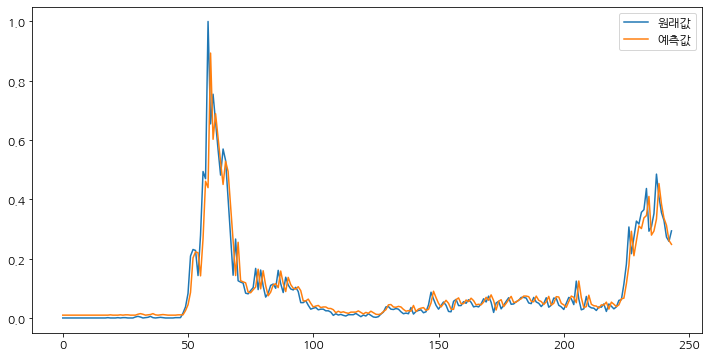

In [20]:
ori_to_show = testY.reshape(-1,1)
prd_to_show = testPredict

plt.figure(figsize=(12, 6))
plt.plot(ori_to_show, label = '원래값')
plt.plot(prd_to_show, label = '예측값')
plt.legend(loc = 'best')
plt.show()

In [21]:
# 이탈리아 데이터 학습


train_dataset = ita_dataset
trainX, trainY = create_dataset(ger_dataset, look_back)

NameError: name 'ita_dataset' is not defined

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [ ]:
model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=0)

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


trainPredict_rescale = scaler.inverse_transform(trainPredict)
trainY_rescale = scaler.inverse_transform([trainY])
testPredict_rescale = scaler.inverse_transform(testPredict)
testY_rescale = scaler.inverse_transform([testY])
    
    
trainScore = math.sqrt(mean_squared_error(trainY_rescale[0], trainPredict_rescale[:,0]))
testScore = math.sqrt(mean_squared_error(testY_rescale[0], testPredict_rescale[:,0]))

    
trainPredictPlot = np.empty_like(train_dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict_rescale)+look_back, :] = trainPredict_rescale
    
testPredictPlot = np.empty_like(test_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back:len(testPredict_rescale)+look_back, :] = testPredict_rescale

In [ ]:
# 미국 데이터 학습

train_dataset = usa_dataset
trainX, trainY = create_dataset(ger_dataset, look_back)

trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1], 1))

model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=0)

testPredict = model.predict(testX)

testPredict = scaler.inverse_transform(testPredict)

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(testScore)

In [ ]:
# 멕시코 데이터 학습

train_dataset = mex_dataset
trainX, trainY = create_dataset(ger_dataset, look_back)

trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1], 1))

model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=0)

testPredict = model.predict(testX)

testPredict = scaler.inverse_transform(testPredict)

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(testScore)

In [ ]:
# 영국 데이터 학습

train_dataset = uk_dataset
trainX, trainY = create_dataset(ger_dataset, look_back)

trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1], 1))

model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=0)

testPredict = model.predict(testX)

testPredict = scaler.inverse_transform(testPredict)

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(testScore)

In [ ]:
testPredictPlot = np.empty_like(test_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back:len(testPredict)+look_back, :] = testPredict

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(test_dataset), label = '원래값')
plt.plot(testPredictPlot, label = '예측값')
plt.legend(loc = 'best')
plt.show()

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
    
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
    
    
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    
trainPredictPlot = np.empty_like(train_dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    
testPredictPlot = np.empty_like(test_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back:len(testPredict)+look_back, :] = testPredict

In [ ]:
print(trainScore)
print(testScore)

In [ ]:
train_dataset = kor_dataset
test_dataset = corona_dataset

In [ ]:
look_back = 1
trainX, trainY = create_dataset(kor_dataset, look_back)
testX, testY = create_dataset(corona_dataset, look_back)

In [ ]:
# 학습 데이터 한국

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(test_dataset), label = '원래값')
plt.plot(testPredictPlot, label = '예측값')
plt.legend(loc = 'best')
plt.show()

In [ ]:
testX

In [ ]:
testPredictPlot

In [ ]:
cor_predict = pd.DataFrame(testPredictPlot)